# <center>NON-INFORMATIVE PRIORS</center>

Một trong những qui trình Bayesian Inference là làm cho prior có càng ít thông tin càng tốt.  
Hay hơn nữa, chúng ta có thể dùng những prior mà nó không chứa thông tin gì cả.  

Ví dụ:  
- Đồng xu có thể dùng prior là Uniform(0,1) hoặc Beta(1,1) do mọi khả năng p(head) đều như nhau, effective sample size =2 nên nó còn chứa thông tin mơ hồ.
- Cực đoan hơn, ta dùng improper prior là beta(0,0)

---
# IMPROPER PRIORS
là những prior có tích phân PDF = infinity.  
Những prior về lý thuyết là không thực tế, tuy nhiên khi ra posterior thì posterior vẫn có thể dùng ra, cho 95% CI, và inference trên đó.

Một số improper priors:
- Bernoulli/binomial: Beta(0,0)
- Normal: $f(\mu) \propto 1  $  
Khi đó, posterior $f(\mu|y) \propto f(y|\mu)f(\mu) = f(y|\mu)$  
posterior $f(\mu|y) \sim N(\overline{y}, \sigma^2/n)$  
Ta thấy nó tương tự với frequentist inference.
- Normal with variance unknown: $f(\sigma^2) \propto \Gamma^{-1} (0, 0)$  
Hay $ f(\sigma^2) \propto 1/\sigma^2 $  
Khi đó, posterior $f(\sigma^2|y) \sim \Gamma^{-1} (a, b) $  
$ a =\frac{n-1}{2} $  
$ b = \frac{1}{2} \sum(y_i- \overline{y})^2 $

--- 
# Jeffreys prior
là priors không bị đổi hình dạng khi theta bị thay đổi thành g(theta). Prior này thích hợp cho scale parameters.  
Jeffreys prior: $ f(\theta) \propto \sqrt{I(\theta)} $  
Với  $I(\theta) $ là fisher information

$I(\theta) =\int \left( \frac{\delta}{\delta\theta} log(f(;\theta))      \right)^2 f(x;\theta) dx$  
fisher information càng cao, data có likelihood quanh $\theta$ cao


Normal: 
- Known variance $f(\mu) \propto 1$
- Unknown variance $f(\mu, \sigma^2) \propto 1/\sigma^2 $  


Bernoulli: $f(\theta) \propto \theta^{-1/2}(1-\theta)^{-1/2} = \text{beta} (1/2, 1/2) $

---
## Ví dụ 1:
Nếu ta chọn:  
Prior Beta(0, 0)  
Likelihood bernoulli ( 4 heads, 1 tail)  

=> Posterior Beta(4, 1), trung bình là 0.8  

## Ví dụ 2:
Nếu ta chọn:  
Prior $f(\theta) \propto 1$
Likelihood normal có data ( 94.6, 95.4, 96.2, 94.9, 95.9 )  
var của data được chọn trước là 0.25  
tức là n=5, mean=95.4, var=0.25  

=> posterior Normal ( 95.4, (0.25/5)=0.05 )

## Ví dụ 3:
Vẽ Jeffreys prior cho bernoulli/binomial, = Beta(1/2, 1/2)

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

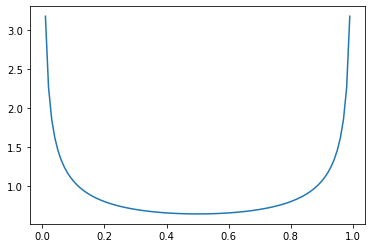

In [3]:
arr = np.linspace(0,1,100)
plt.plot(arr, st.beta(a=1/2, b=1/2).pdf(arr));

## Ví dụ 4:
Nghiên cứu A gọi $\theta$ là tỉ lệ outcome của nghiên cứu. Để prior không chứa thông tin nhiều, nghiên cứu A chọn prior là Uniform(0,1)  

Nghiên cứu B gọi odds $\Phi = \frac{\theta}{1-\theta}$ là chỉ số quan tâm của nghiên cứu. Tương tự, họ chọn prior là Uniform cho $\Phi$  

**Từ posterior của $\Phi$, ta suy luận ra posterior của $\theta$, nhưng posterior $\theta$ của nghiên cứu A và nghiên cứu B khác nhau hoàn toàn.**  

Prior của $\theta$ trong nghiên cứu A (uniform) làm cho prior của $\Phi$ là = $f(\Phi) = \frac{1}{(1+\Phi)^2} I_{\{\Phi>0  \}} $  
Chứ không phải Uniform như trong nghiên cứu

Để tránh xảy ra tình huống này do transformation của $\theta$, 2 nghiên cứu này nên dùng Jeffreys Prior là Beta(1/2, 1/2).